In [2]:
# 導入Python數據處理套件
import numpy as np
import pandas as pd
# 導入繪圖套件
import matplotlib.pyplot as plt
# 導入迴歸模型套件
from sklearn.linear_model import LinearRegression

In [3]:
# 讀取CSV檔
data = "/split_data"
X_train = pd.read_csv("." + data*3 + "(0.2)/X_train.csv")
X_test = pd.read_csv("." + data*3 + "(0.2)/X_test.csv")
y_train = pd.read_csv("." + data*3 + "(0.2)/y_train.csv")
y_test = pd.read_csv("." + data*3 + "(0.2)/y_test.csv")
print(X_train.head())
print("-"*80)
print(X_test.head())
print("-"*80)
print(y_train.head())
print("-"*80)
print(y_test.head())

    age   bmi  bloodpressure  children  diabetic  smoker  is_male  \
0  32.0  39.0           96.0       0.0      True    True    False   
1  41.0  31.1           93.0       0.0     False   False    False   
2  47.0  23.1           92.0       0.0     False   False    False   
3  34.0  30.7           90.0       1.0     False   False    False   
4  60.0  32.1           98.0       2.0     False   False    False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 1                 0                 0  
1                 0                 0                 1                 0  
2                 1                 0                 0                 0  
3                 0                 0                 1                 0  
4                 0                 0                 1                 0  
--------------------------------------------------------------------------------
    age   bmi  bloodpressure  children  diabetic

In [4]:
# 選擇特定特徵列
X_train = X_train[['age','bmi','bloodpressure','children','diabetic','smoker','is_male',
                   'region_northeast','region_northwest','region_southeast','region_southwest']]
X_test = X_test[['age','bmi','bloodpressure','children','diabetic','smoker','is_male',
                 'region_northeast','region_northwest','region_southeast','region_southwest']]
y_train = y_train['claim']
y_test = y_test['claim']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1065, 11) (1065,)
(267, 11) (267,)


In [5]:
# 導入迴歸模型套件
from sklearn.linear_model import LinearRegression

# 訓練多元迴歸模型
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# 使用模型進行預測
y_pred = regressor.predict(X_test)

In [6]:
# 導入評估模型
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("平均平方誤差 (MSE):", mse.round(4))
print("絕對平均誤差 (MAE):", mae.round(4))
print("決定係數 (R2):", r2.round(4))

平均平方誤差 (MSE): 38870745.3411
絕對平均誤差 (MAE): 4910.9065
決定係數 (R2): 0.7303


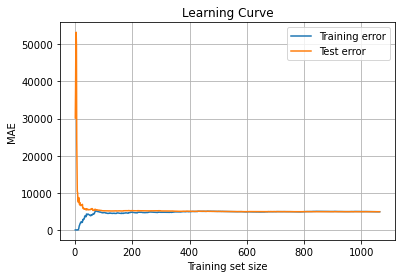

In [7]:
def learning_curve(model):
  # 創建儲存評估分數的array
  train_errors, test_errors = [], []
 
  # 依照 dataset的 size取得 觀察在不同大小的 dataset model的學習情況
  for m in range(1, len(X_train)):
      model.fit(X_train[:m], y_train[:m])
      y_train_predict = model.predict(X_train[:m])
      y_test_predict = model.predict(X_test)
      train_errors.append(mean_absolute_error(y_train[:m], y_train_predict))
      test_errors.append(mean_absolute_error(y_test, y_test_predict))
 
  # 畫學習曲線
  plt.figure()
  plt.title("Learning Curve")
  plt.plot(range(1, len(X_train)), train_errors, label='Training error')
  plt.plot(range(1, len(X_train)), test_errors, label='Test error')
  plt.xlabel('Training set size')
  plt.ylabel('MAE')
  plt.legend()
  plt.grid()
  plt.show()
 
learning_curve(regressor)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# 定義多項式迴歸模型
def create_polynomial_regression_model(degree):
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    return polyreg

# 準備要調整的參數
param_dist = {
    'polynomialfeatures__degree': [1, 2, 3, 4]  # 設定多項式的次數
}

# 創建多項式迴歸模型
polyreg = create_polynomial_regression_model(degree=2)  # 初始次數為2

# 使用 RandomizedSearchCV 尋找最佳次數
random_search = RandomizedSearchCV(polyreg, param_distributions=param_dist, n_iter=4, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# 印出最佳參數
print("最佳多項式次數:", random_search.best_params_['polynomialfeatures__degree'])

最佳多項式次數: 2


In [9]:
# 導入多項式套件，建構多項式迴歸模型所需的套件
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 創建多項式特徵轉換器
polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())

# 使用多項式迴歸模型進行訓練
polyreg.fit(X_train, y_train)

# 使用多項式迴歸模型進行預測
y_pred = polyreg.predict(X_test)

In [10]:
# 導入評估模型
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("平均平方誤差 (MSE):", mse.round(4))
print("絕對平均誤差 (MAE):", mae.round(4))
print("決定係數 (R2):", r2.round(4))

平均平方誤差 (MSE): 31883359.496
絕對平均誤差 (MAE): 4312.9705
決定係數 (R2): 0.7788
